In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster import cluster_visualizer_multidim
from sklearn.decomposition import PCA
import pickle
from tqdm.notebook import tqdm

In [20]:
dataset_description = pd.read_csv('../Data/Dataset_Description.csv')

In [21]:
# dataset_description

In [22]:
population_data_raw = pd.read_csv('../Data/population.csv')
# population_data_raw 

In [23]:
def preprocessing(df):

    #replace ? with Nan
    df = df.replace({' ?' :  np.nan})

    #drop columns with more than 40$ NaN values
    cols = df.columns
    missing_percentages = (df.isna().sum() / len(df)) * 100
    cols_to_drop = []
    for col in cols:
        if(missing_percentages[col] > 40.0):
            cols_to_drop.append(col)
    print(f'Dropping = {cols_to_drop}')
    df = df.drop(cols_to_drop, axis=1)
    return df

In [24]:
data = preprocessing(population_data_raw)
print(data.shape)

Dropping = ['MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSUN']
(199523, 36)


In [25]:
def plot_histogram(df, numeric_columns, categorical_columns):
    # features = df.columns
    # for feat in features:
    #     plt.figure(figsize=(25,5))
    #     if(feat in numeric_columns):
    #         df[feat].hist(bins=10,edgecolor='black', linewidth=1.5)

    #     else:
    #         unique_cat_values = len(df[feat].unique())
    #         print(f'No. of unique Categories : {unique_cat_values}')
    #         df[feat].hist(bins = unique_cat_values, edgecolor='black', linewidth=1.5)
    #     plt.xlabel(feat)
    #     plt.ylabel('Count')
    #     plt.title(f'Histogram : {feat}')
    #     plt.savefig(f'../Plots/Feature_Analysis/{feat}_hist', facecolor='w', bbox_inches='tight')
    #     plt.show()
    features = df.columns
    for feat in features:
        plt.figure(figsize=(25, 5))
        # if(feat in numeric_columns)
        unique_cat_values = len(df[feat].unique())
        print(f'No. of unique Categories : {unique_cat_values}')
        df[feat].astype(str).hist(bins = unique_cat_values, edgecolor='black', linewidth=1.5)
        plt.xlabel(feat)
        plt.ylabel('Count')
        plt.title(f'Histogram : {feat}')
        plt.savefig(f'../Plots/Feature_Analysis/{feat}_hist', facecolor='w', bbox_inches='tight')
        plt.show()

In [26]:
def compute(df, col):
    max_freq = df[col].value_counts().max()
    max_perc = (max_freq / df.shape[0]) * 100
    print(max_perc)

In [27]:
def feature_analysis(df):
    data_columns = df.columns
    numeric_columns = ['AAGE', 'AHRSPAY', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'WKSWORK']
    all_cols_set = set(data_columns)
    numerical_cols_set = set(numeric_columns)
    categorical_cols = list(all_cols_set - numerical_cols_set)
    
    for col in numeric_columns:
        df[col] = pd.cut(x=df[col], bins=6)
    # df['AAGE']
    # plot_histogram(df, numeric_columns, categorical_cols)
    total_count = df.shape[0]

    cols_to_drop = []
    for col in data_columns:
        max_freq = df[col].value_counts().max()
        max_perc = (max_freq / total_count) * 100
        if(max_perc > 70.0):
            cols_to_drop.append(col)
    print(f'Dropping {len(cols_to_drop)} cols \n {cols_to_drop}')
    df = df.drop(cols_to_drop, axis=1)
    return df

    # print(df)


    # print(categorical_cols)


In [28]:
# data.mode()

In [29]:
data = feature_analysis(data)

Dropping 19 cols 
 ['AHRSPAY', 'AHSCOL', 'ARACE', 'AREORGN', 'AUNMEM', 'AUNTYPE', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'GRINREG', 'GRINST', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA', 'VETYN']


In [30]:
data.columns

Index(['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AMARITL', 'AMJIND',
       'AMJOCC', 'ASEX', 'AWKSTAT', 'FILESTAT', 'HHDFMX', 'HHDREL', 'MIGSAME',
       'NOEMP', 'WKSWORK', 'YEAR'],
      dtype='object')

In [31]:
data.isna().sum()

AAGE        0
ACLSWKR     0
ADTIND      0
ADTOCC      0
AHGA        0
AMARITL     0
AMJIND      0
AMJOCC      0
ASEX        0
AWKSTAT     0
FILESTAT    0
HHDFMX      0
HHDREL      0
MIGSAME     0
NOEMP       0
WKSWORK     0
YEAR        0
dtype: int64

In [32]:
data.mode()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AMARITL,AMJIND,AMJOCC,ASEX,AWKSTAT,FILESTAT,HHDFMX,HHDREL,MIGSAME,NOEMP,WKSWORK,YEAR
0,"(-0.09, 15.0]",Not in universe,0,0,High school graduate,Never married,Not in universe or children,Not in universe,Female,Children or Armed Forces,Nonfiler,Householder,Householder,Not in universe under 1 year old,0,"(-0.052, 8.667]",94


In [33]:
def column_modifications(df):
    column_modes = df.mode()
    data_cols = df.columns
    print(df.isna().sum())
    for col in data_cols:
        missing_vals = df[col].isna().sum()
        if(missing_vals > 0):
            df[col] = df[col].fillna(column_modes[col][0])
    print(df.isna().sum())
    one_hot_encoded = pd.get_dummies(df, columns=list(df.columns))
    df = one_hot_encoded

    return df        


In [34]:
data = column_modifications(data)
print(data.shape)

AAGE        0
ACLSWKR     0
ADTIND      0
ADTOCC      0
AHGA        0
AMARITL     0
AMJIND      0
AMJOCC      0
ASEX        0
AWKSTAT     0
FILESTAT    0
HHDFMX      0
HHDREL      0
MIGSAME     0
NOEMP       0
WKSWORK     0
YEAR        0
dtype: int64
AAGE        0
ACLSWKR     0
ADTIND      0
ADTOCC      0
AHGA        0
AMARITL     0
AMJIND      0
AMJOCC      0
ASEX        0
AWKSTAT     0
FILESTAT    0
HHDFMX      0
HHDREL      0
MIGSAME     0
NOEMP       0
WKSWORK     0
YEAR        0
dtype: int64
(199523, 257)


In [35]:
data

,"AAGE_(-0.09, 15.0]","AAGE_(15.0, 30.0]","AAGE_(30.0, 45.0]","AAGE_(45.0, 60.0]","AAGE_(60.0, 75.0]","AAGE_(75.0, 90.0]",ACLSWKR_ Federal government,ACLSWKR_ Local government,ACLSWKR_ Never worked,ACLSWKR_ Not in universe,...,NOEMP_5,NOEMP_6,"WKSWORK_(-0.052, 8.667]","WKSWORK_(8.667, 17.333]","WKSWORK_(17.333, 26.0]","WKSWORK_(26.0, 34.667]","WKSWORK_(34.667, 43.333]","WKSWORK_(43.333, 52.0]",YEAR_94,YEAR_95
0,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
199519,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
199520,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
199521,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


PCA

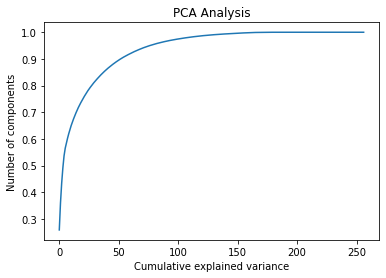

In [36]:
pca = PCA()
pca.fit(np.array(data))
exp_var_rat = pca.explained_variance_ratio_
cum_exp_var_perc = np.cumsum(exp_var_rat)
plt.plot(cum_exp_var_perc)
plt.xlabel('Cumulative explained variance')
plt.ylabel('Number of components')
plt.title('PCA Analysis')
plt.savefig('../Plots/Dimesionality_Reduction/pca_plot.png', facecolor='white', bbox_inches='tight')
plt.show()


In [37]:
print(cum_exp_var_perc[15])

0.7079537385078268


In [38]:
# exp_var = []
# for comp in tqdm(range(2, 111)):
#     pca = PCA(comp)
#     pca.fit(np.array(data))
#     exp_var_rat = round(sum(list(pca.explained_variance_ratio_))*100, 2)
#     print(f'comps = {comp} | var = {exp_var_rat}')
#     exp_var.append(exp_var_rat)

In [39]:
# plt.plot([x for x in range(2, 101)], exp_var)


In [40]:
pca_final = PCA(n_components=15)
dim_reduced_data = pca_final.fit_transform(np.array(data))

In [41]:
dim_reduced_data.shape

(199523, 15)

CLUSTERING

In [42]:
avg_within_cluster_distance = {}

for k_value in tqdm(range(1, 25)):

    print(f'-------- K VALUE = {k_value} --------')
    random_points = np.array(pd.DataFrame(dim_reduced_data).sample(n=k_value)).tolist()

    # print('PERFORMING CLUSTERING')
    medians_init = random_points
    kmedians_instance = kmedians(dim_reduced_data, medians_init)
    kmedians_instance.process()

    file = open(f'../models/kmedians_{k_value}.pickle', 'wb')
    pickle.dump(kmedians_instance, file)
    file.close()

    avg_cluster_dist = kmedians_instance.get_total_wce()
    avg_within_cluster_distance[k_value] = avg_cluster_dist
    print(f'average within cluster distance = {avg_cluster_dist}')

    # print('INSTANCE PROCESSED')
    clusters = kmedians_instance.get_clusters()
    medians = kmedians_instance.get_medians()
    np.save(f'../model_info/clusters_{k_value}.npy', np.array(clusters))
    np.save(f'../model_info/medians_{k_value}.npy', np.array(medians))

    # print('CLUSTERING PERFORMED')



  0%|          | 0/24 [00:00<?, ?it/s]

-------- K VALUE = 1 --------
average within cluster distance = 3176876.974281428
-------- K VALUE = 2 --------


In [ ]:
# random_points = np.array(pd.DataFrame(B).sample(n=10)).tolist()

In [ ]:
# print('PERFORMING CLUSTERING')
# medians_init = random_points
# kmedians_instance = kmedians(B, medians_init)
# kmedians_instance.process()
# print('INSTANCE PROCESSED')
# clusters = kmedians_instance.get_clusters()
# medians = kmedians_instance.get_medians()
# print('CLUSTERING PERFORMED')


In [ ]:
# visualizer = cluster_visualizer_multidim()
# # visualizer.append_clusters(clusters, B)
# # visualizer.append_cluster(medians_init, marker='*', markersize=10)
# visualizer.append_cluster(medians, marker='*', markersize=10)
# visualizer.show()